## Simple and multilinear regression practice along with ridge, lasso and elasticnet

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

### Simple Linear Regression

In [160]:
#Dataset -  Height_Weight CSV
df=pd.read_csv('Datasets/height-weight.csv')

In [161]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


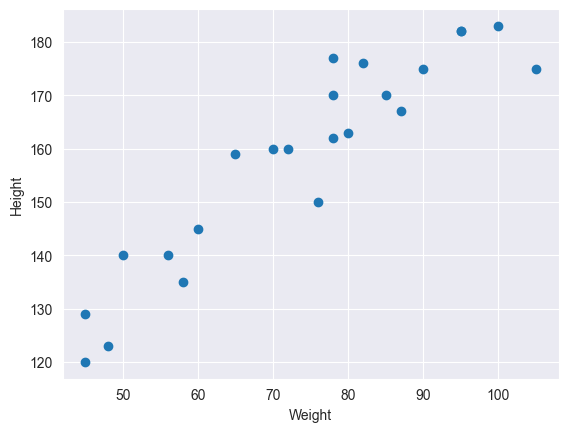

In [162]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

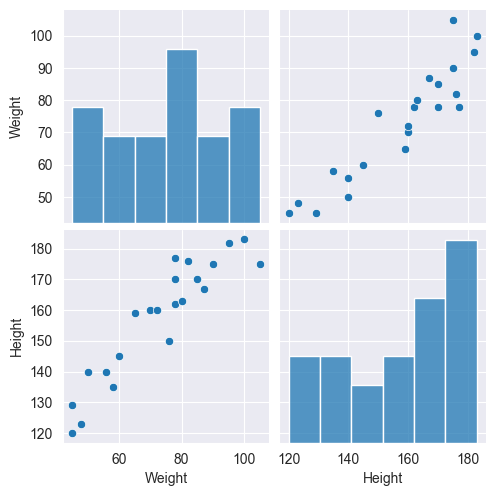

In [163]:
sns.pairplot(df)

<Axes: >

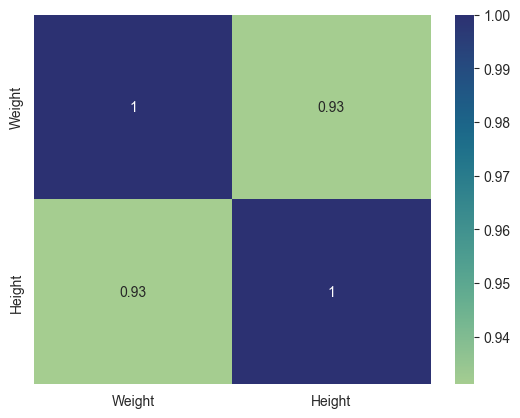

In [164]:
sns.heatmap(df.corr(), cmap='crest', annot=True)

In [165]:
#Divide the dataset into X and y
X = df[['Weight']]
y = df['Height']

In [166]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [167]:
X_train.head()

,Weight
5,78
2,48
11,95
20,45
3,60


## Standardization

In [168]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

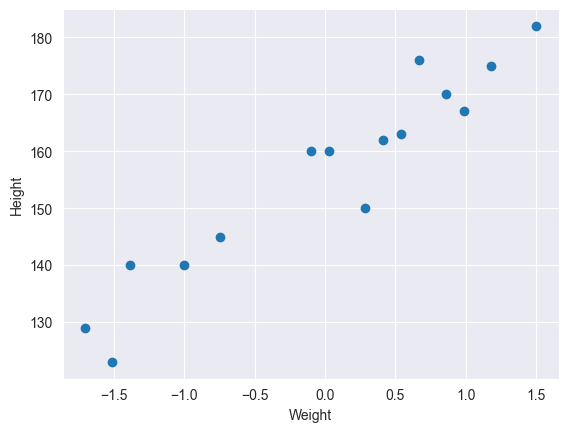

In [169]:
plt.scatter(X_train, y_train)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [170]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [171]:
linear_reg_pred = linear_reg.predict(X_test)

In [172]:
score = r2_score(y_test, linear_reg_pred)
print("R2 Score: ", score)
print('The slope or coefficient of weight is: ', linear_reg.coef_)
print("Intercept: ", linear_reg.intercept_)

R2 Score:  0.8074173081896224
The slope or coefficient of weight is:  [16.26979346]
Intercept:  156.13333333333333


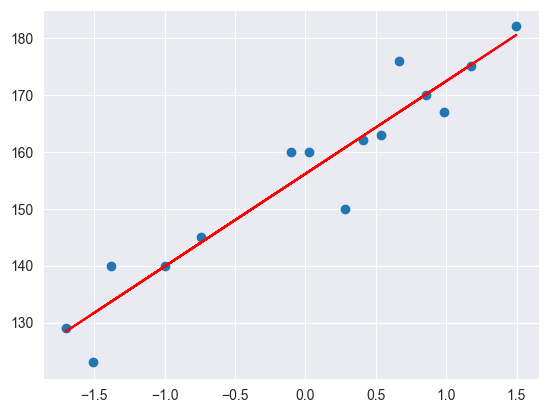

In [173]:
plt.scatter(X_train, y_train)
plt.plot(X_train, linear_reg.predict(X_train), 'r')

In [174]:
print("Mean squared Error: ",  mean_squared_error(y_test, linear_reg_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, linear_reg_pred))
print("Root Mean squared Error: ", root_mean_squared_error(y_test, linear_reg_pred))
print("R2 score: ", r2_score(y_test, linear_reg_pred))

Mean squared Error:  91.42562383241722
Mean Absolute Error:  8.332521348806658
Root Mean squared Error:  9.561674739940552
R2 score:  0.8074173081896224


In [175]:
#new data point weight is 80
scaled_weight = scaler.transform([[80]])
print(linear_reg.predict(scaled_weight))

[164.890154]


## MultiLinear Regression -> using LinearRegression, Lasso, Ridge and ElasticNet

## Used datasets -> House Price Prediction

In [176]:
df = pd.read_csv('Datasets/Housing.csv')

In [177]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [178]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [180]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [181]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [182]:
cat_features = [features for features in df.columns if df[features].dtype == 'O']
num_features = df.select_dtypes(exclude='object').columns

In [183]:
cat_features

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [184]:
for feature in num_features:
    print(feature)

price
area
bedrooms
bathrooms
stories
parking


In [185]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [186]:
df['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [187]:
df['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [188]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [189]:
df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [190]:
df['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [191]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

## Feature Engineering - Encoding and Standardization

In [192]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

<Axes: >

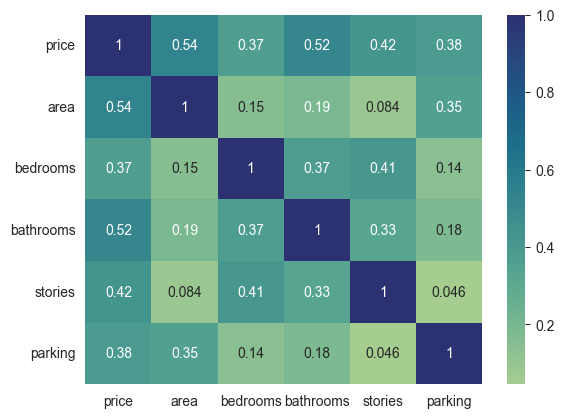

In [193]:
sns.heatmap(df.corr(numeric_only=True), cmap='crest', annot=True)

In [194]:
X = df.drop('price', axis=1)

In [195]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [196]:
y=df['price']

In [197]:
type(y)

pandas.core.series.Series

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [199]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
261,3510,3,1,2,yes,no,no,no,no,0,no,semi-furnished
353,2856,3,1,3,yes,no,no,no,no,0,yes,furnished
94,6000,4,2,4,yes,no,no,no,no,1,no,semi-furnished
180,4500,4,2,1,no,no,yes,no,yes,2,no,semi-furnished
192,6600,3,1,1,yes,yes,yes,no,no,0,yes,furnished


In [200]:
X_train.shape, y_train.shape

((365, 12), (365,))

In [201]:

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
multi_col = ['furnishingstatus']
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']  # example, add yours

preprocessor = ColumnTransformer(
    transformers=[
        ('binary', OrdinalEncoder(categories=[['no', 'yes']] * len(binary_cols)), binary_cols),
        ('ohe', OneHotEncoder(drop='first'), multi_col),
        ('scaler', StandardScaler(), numeric_cols)
    ]
)

In [202]:
import sys
np.set_printoptions(threshold=sys.maxsize)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [203]:
feature_names = preprocessor.get_feature_names_out()

In [204]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_true, y_pred)
    return mae,mse,rmse, r2_square

In [205]:
feature_names

array(['binary__mainroad', 'binary__guestroom', 'binary__basement',
       'binary__hotwaterheating', 'binary__airconditioning',
       'binary__prefarea', 'ohe__furnishingstatus_semi-furnished',
       'ohe__furnishingstatus_unfurnished', 'scaler__area',
       'scaler__bedrooms', 'scaler__bathrooms', 'scaler__stories',
       'scaler__parking'], dtype=object)

In [206]:
models={
    "Linear Regression (MultiLinear)":LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "K-Nearest Neighbours":KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor()
}

In [207]:
for key, value in models.items():
    model = value
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    model_train_mae, model_train_mse , model_train_rmse,  model_train_r2_sqaure = evaluate_model(y_train, y_train_predict)
    model_test_mae, model_test_mse , model_test_rmse,  model_test_r2_sqaure = evaluate_model(y_test, y_test_predict)

    print(f'Model : {key}')

    print("\n===== TRAINING METRICS =====")
    print(f"MAE: {model_train_mae:.4f}")
    print(f"MSE: {model_train_mse:.4f}")
    print(f"RMSE: {model_train_rmse:.4f}")
    print(f"R² Score: {model_train_r2_sqaure:.4f}")

    print("\n===== TEST METRICS =====")
    print(f"MAE: {model_test_mae:.4f}")
    print(f"MSE: {model_test_mse:.4f}")
    print(f"RMSE: {model_test_rmse:.4f}")
    print(f"R² Score: {model_test_r2_sqaure:.4f}")
    print("==" *30)


Model : Linear Regression (MultiLinear)

===== TRAINING METRICS =====
MAE: 721566.6746
MSE: 970200212050.9993
RMSE: 984987.4172
R² Score: 0.6866

===== TEST METRICS =====
MAE: 902329.6343
MSE: 1463722024917.1450
RMSE: 1209843.8019
R² Score: 0.6585
Model : Ridge

===== TRAINING METRICS =====
MAE: 720663.6718
MSE: 970306029983.3090
RMSE: 985041.1311
R² Score: 0.6866

===== TEST METRICS =====
MAE: 903429.1190
MSE: 1467353917199.7822
RMSE: 1211343.8476
R² Score: 0.6576
Model : Lasso

===== TRAINING METRICS =====
MAE: 721566.1855
MSE: 970200212107.9719
RMSE: 984987.4172
R² Score: 0.6866

===== TEST METRICS =====
MAE: 902329.9394
MSE: 1463723685168.2024
RMSE: 1209844.4880
R² Score: 0.6585
Model : ElasticNet

===== TRAINING METRICS =====
MAE: 789579.7958
MSE: 1194274215137.4133
RMSE: 1092828.5388
R² Score: 0.6142

===== TEST METRICS =====
MAE: 1004018.0619
MSE: 1810240129290.3230
RMSE: 1345451.6451
R² Score: 0.5776
Model : K-Nearest Neighbours

===== TRAINING METRICS =====
MAE: 638107.9562
MS

## Hyper-Parameter Tuning

In [208]:
# The models which performed well and need to be tuned are: Random Forest, XGBoost, Decision Tree
rf_params = {
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}
gradientboost_param = {
    'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate':[0.1,0.01,0.02,0.03],
    'n_estimators':[100,200,500,1000],
    'max_depth':[5,8,15,None,10],
    'min_samples_split':[2,8,15,20],
    'criterion':['friedman_mse', 'squared_error']
}
xgboost_param={
    'learning_rate':[0.1,0.01],
    'max_depth':[5,8,12,20,30],
    'n_estimators':[100,200,300],
    'colsample_bytree':[0.5,0.8,1,0.3,0.4]
}
dt_param = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [209]:
randomcv_models = [
    # ("RF", RandomForestRegressor(), rf_params),
    ("GradientBoost", GradientBoostingRegressor(), gradientboost_param),
    # ("XGBoost", XGBRegressor(), xgboost_param),
    # ("Decision Tree", DecisionTreeRegressor(), dt_param)
]

In [210]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
model_params={}
for name, model, param in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=param,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f'------ Best params for {model_name} --------')
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
------ Best params for GradientBoost --------
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None, 'loss': 'absolute_error', 'learning_rate': 0.1, 'criterion': 'squared_error'}


In [211]:
retrain_models={
    # "Decision Tree": DecisionTreeRegressor(splitter= 'best', max_features= 'sqrt', max_depth= 5, criterion='friedman_mse'),
    # "Random Forest": RandomForestRegressor(n_estimators= 1000, min_samples_split= 2, max_features= 5, max_depth= 8),
    # "XGBoost": XGBRegressor(n_estimators= 100, max_depth= 5, learning_rate= 0.1, colsample_bytree= 0.3),
    "GradientBoost": GradientBoostingRegressor(n_estimators= 500, min_samples_split= 15, max_depth= 5, loss= 'absolute_error', learning_rate= 0.03, criterion= 'friedman_mse')
}

In [212]:
for key, value in retrain_models.items():
    model = value
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    model_train_mae, model_train_mse , model_train_rmse,  model_train_r2_sqaure = evaluate_model(y_train, y_train_predict)
    model_test_mae, model_test_mse , model_test_rmse,  model_test_r2_sqaure = evaluate_model(y_test, y_test_predict)

    print(f'Model : {key}')

    print("\n===== TRAINING METRICS =====")
    print(f"MAE: {model_train_mae:.4f}")
    print(f"MSE: {model_train_mse:.4f}")
    print(f"RMSE: {model_train_rmse:.4f}")
    print(f"R² Score: {model_train_r2_sqaure:.4f}")

    print("\n===== TEST METRICS =====")
    print(f"MAE: {model_test_mae:.4f}")
    print(f"MSE: {model_test_mse:.4f}")
    print(f"RMSE: {model_test_rmse:.4f}")
    print(f"R² Score: {model_test_r2_sqaure:.4f}")
    print("==" *30)

Model : GradientBoost

===== TRAINING METRICS =====
MAE: 429136.9242
MSE: 604335215759.4775
RMSE: 777390.0024
R² Score: 0.8048

===== TEST METRICS =====
MAE: 897183.6393
MSE: 1657830413250.2798
RMSE: 1287567.6344
R² Score: 0.6132


## Removing outliers

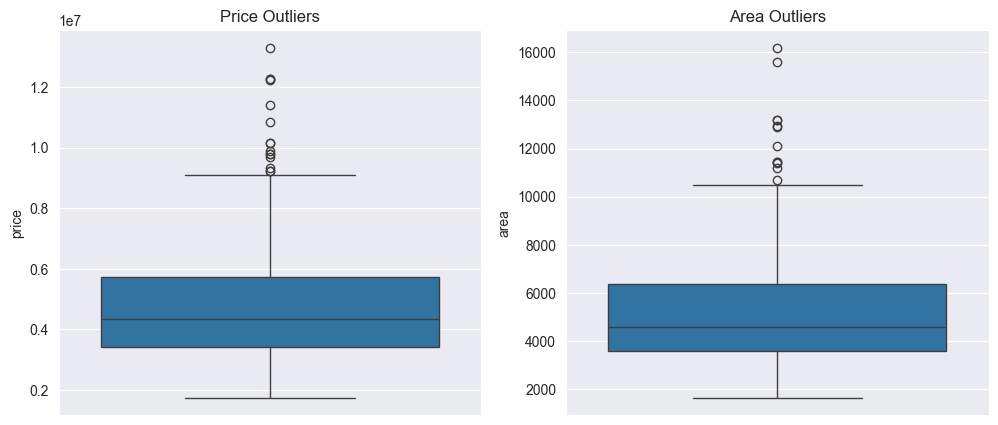

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check 'price' and 'area' (the most likely culprits)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Price Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['area'])
plt.title('Area Outliers')

plt.show()

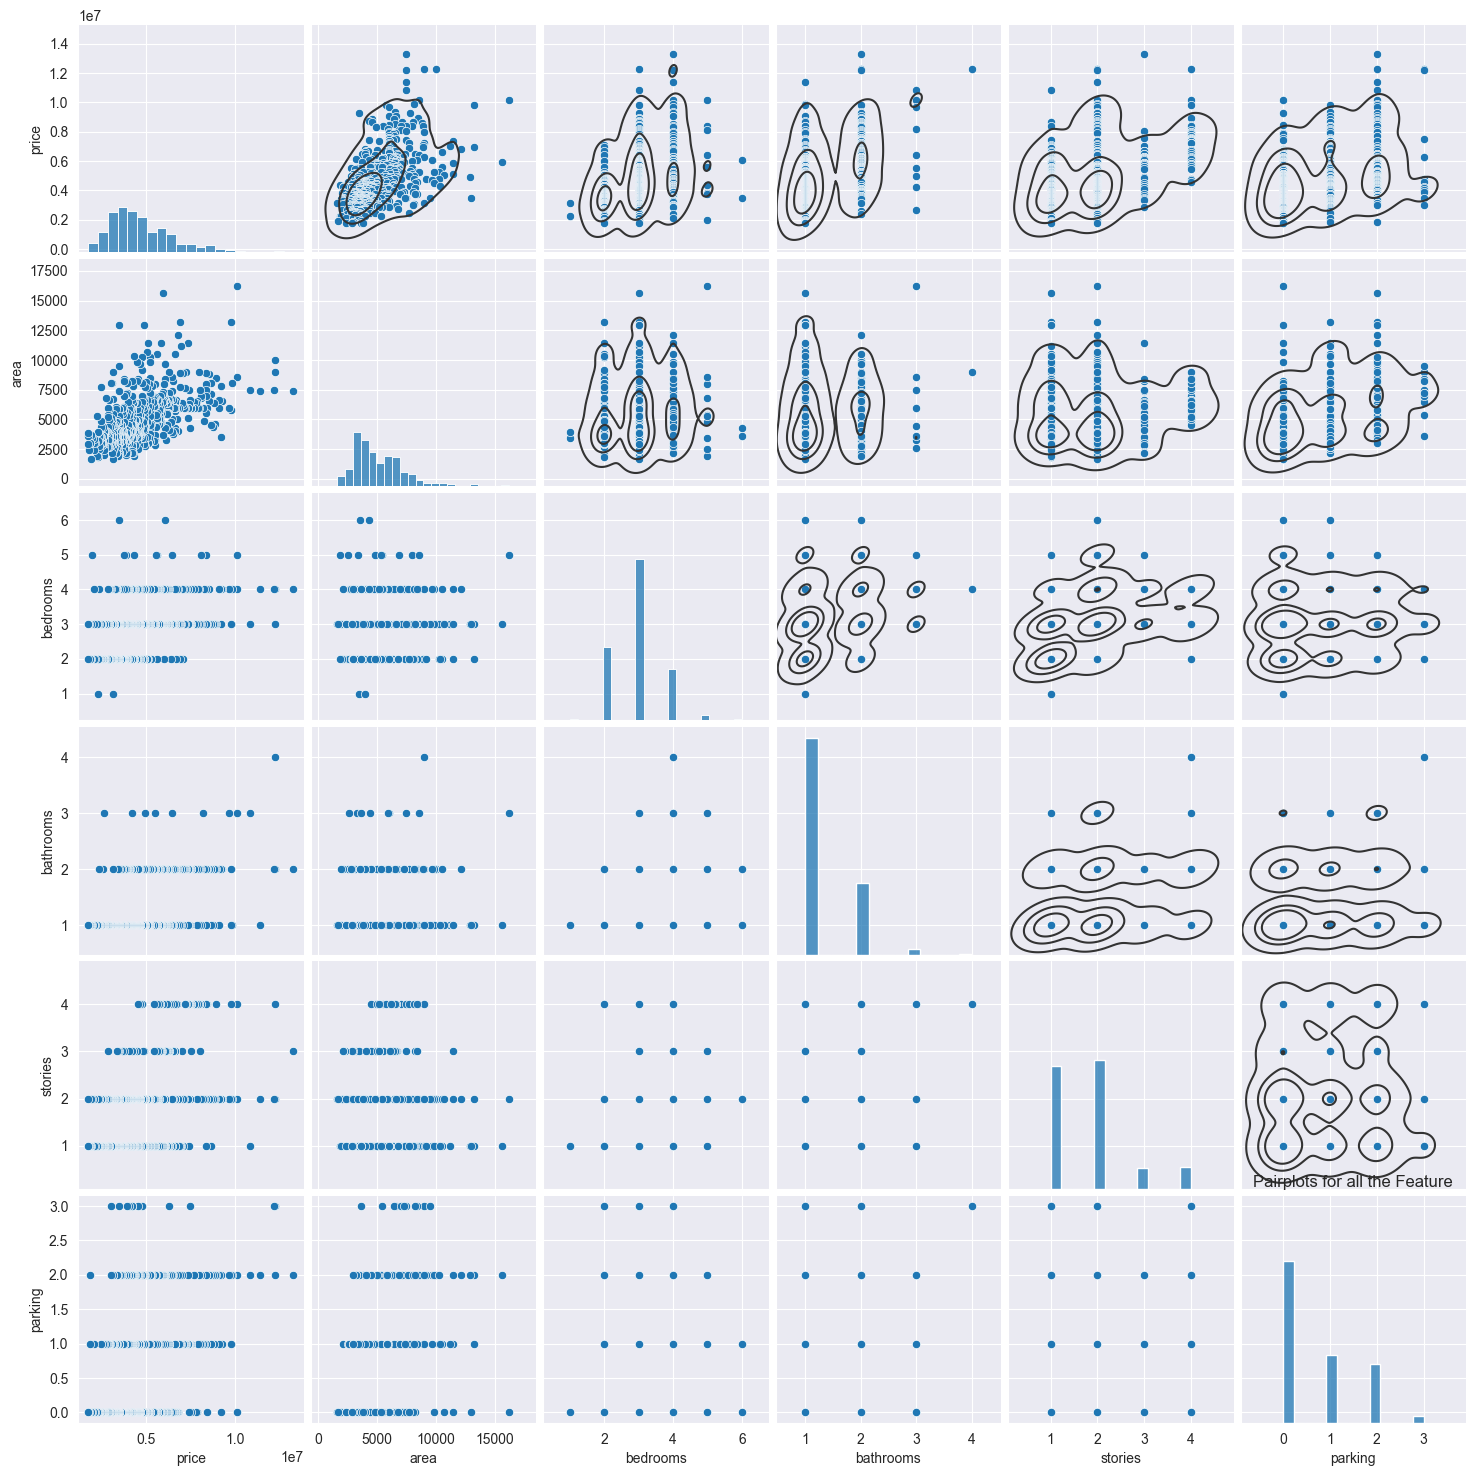

In [214]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [215]:
# 1. Define the columns you want to clean
cols_to_check = ['price', 'area']

# 2. Filter the Dataframe
# We copy the df to avoid SettingWithCopy warnings
df_clean = df.copy()

for col in cols_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter: Keep only rows INSIDE the limits
    df_clean = df_clean[(df_clean[col] >= lower_limit) & (df_clean[col] <= upper_limit)]

print(f"Original Shape: {df.shape}")
print(f"New Shape: {df_clean.shape}")

Original Shape: (545, 13)
New Shape: (517, 13)


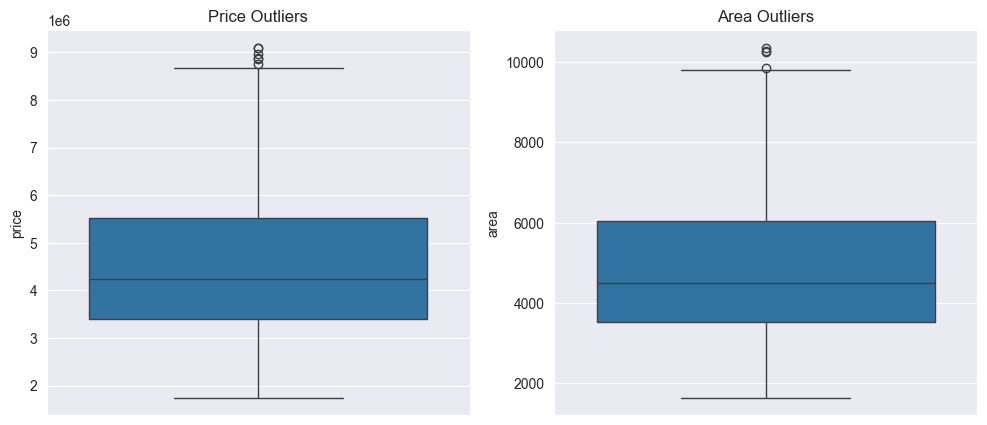

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check 'price' and 'area' (the most likely culprits)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_clean['price'])
plt.title('Price Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['area'])
plt.title('Area Outliers')

plt.show()

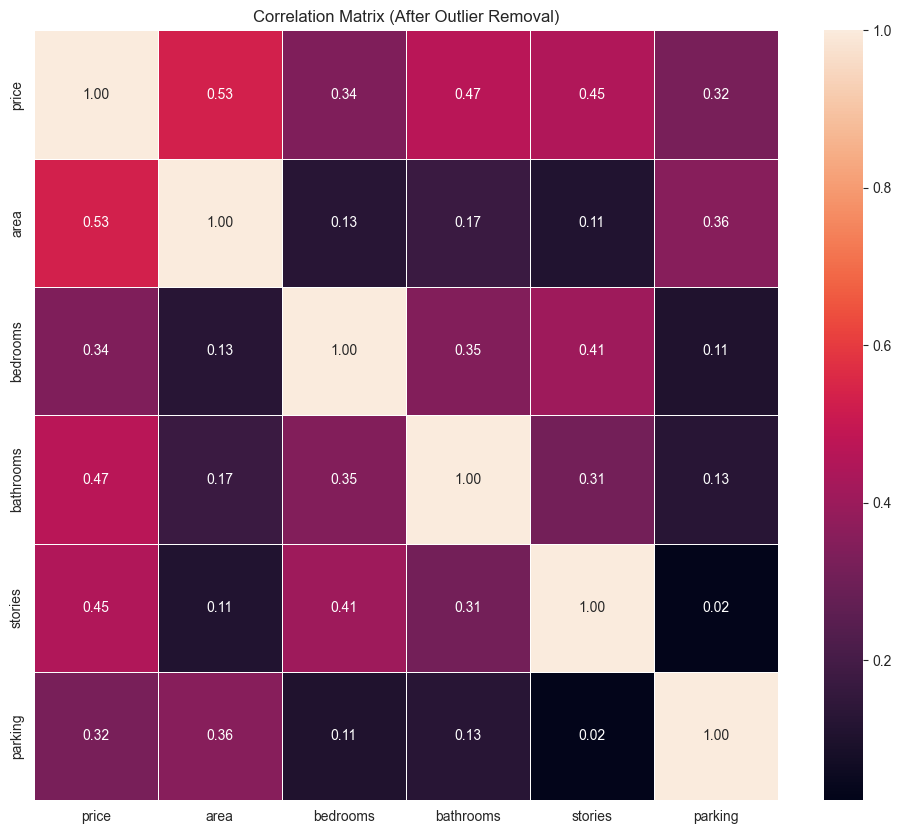

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10))

# 1. Calculate Correlation
# Note: We filter for numeric columns only to avoid errors
corr_matrix = df_clean.select_dtypes(include=[np.number]).corr()

# 2. Plot Heatmap
sns.heatmap(corr_matrix,
            annot=True,        # Show the numbers inside the boxes
            fmt=".2f",         # Round to 2 decimal places
            linewidths=0.5)

plt.title('Correlation Matrix (After Outlier Removal)')
plt.show()

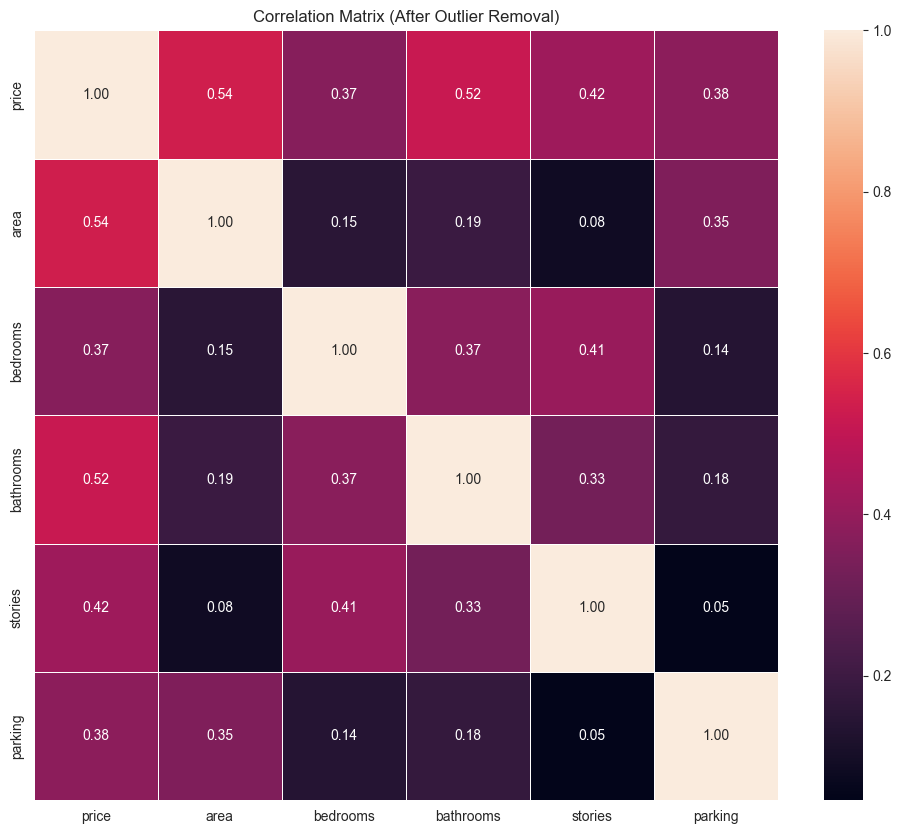

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10))

# 1. Calculate Correlation
# Note: We filter for numeric columns only to avoid errors
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# 2. Plot Heatmap
sns.heatmap(corr_matrix,
            annot=True,        # Show the numbers inside the boxes
            fmt=".2f",         # Round to 2 decimal places
            linewidths=0.5)

plt.title('Correlation Matrix (After Outlier Removal)')
plt.show()

In [219]:
X_new = df_clean.drop('price', axis=1)
y_new=df_clean['price']

In [220]:
X_new.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [221]:
X_new.shape

(517, 12)

In [222]:
df_clean.shape

(517, 13)

In [223]:
y_new.shape

(517,)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size=0.33, random_state=42)